# Which coin has the most abnromal 1h candles?

In [11]:
from DataManagement.data_manager import DataManager
from DataManagement.coin_data import CoinData
from DataManagement.research_coin_symbols import research_ocin_symbol_list
from constants import ATR_ABNORMALITY_COLUMN

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

In [7]:
data_manager = DataManager()

In [8]:
abnormality_time_frame = "1h"
coin_symbol_list = research_ocin_symbol_list

In [33]:
coin_data_list = [data_manager.get_historical_data_CoinData(symbol=symbol, kline_size=abnormality_time_frame) for symbol in coin_symbol_list]
symbol_num_abnormal_1h_candle_dict = {cd.coin_symbol:sum(cd.df[ATR_ABNORMALITY_COLUMN]==1) for cd in coin_data_list}
symbol_data_length_dict = {cd.coin_symbol:len(cd.df) for cd in coin_data_list}
symbol_precent_abnormal_dict = {symbol: 100*(coin_symbol_num_abnormal_1h_candle_dict[symbol]/symbol_data_length_dict[symbol]) for symbol in coin_symbol_list}
# dict(map(lambda x : (x[0],100*(x[1]/x[2]), zip(symbol_num_abnormal_1h_candle_dict.items(), symbol_data_length_dict.values()))))

In [34]:
def plot_sorted_bar_plot(d, title=None):
    sorted_dict = dict(sorted(d.items(), key=lambda x: x[1], reverse = True))
    plt.bar(*zip(*sorted_dict.items()));

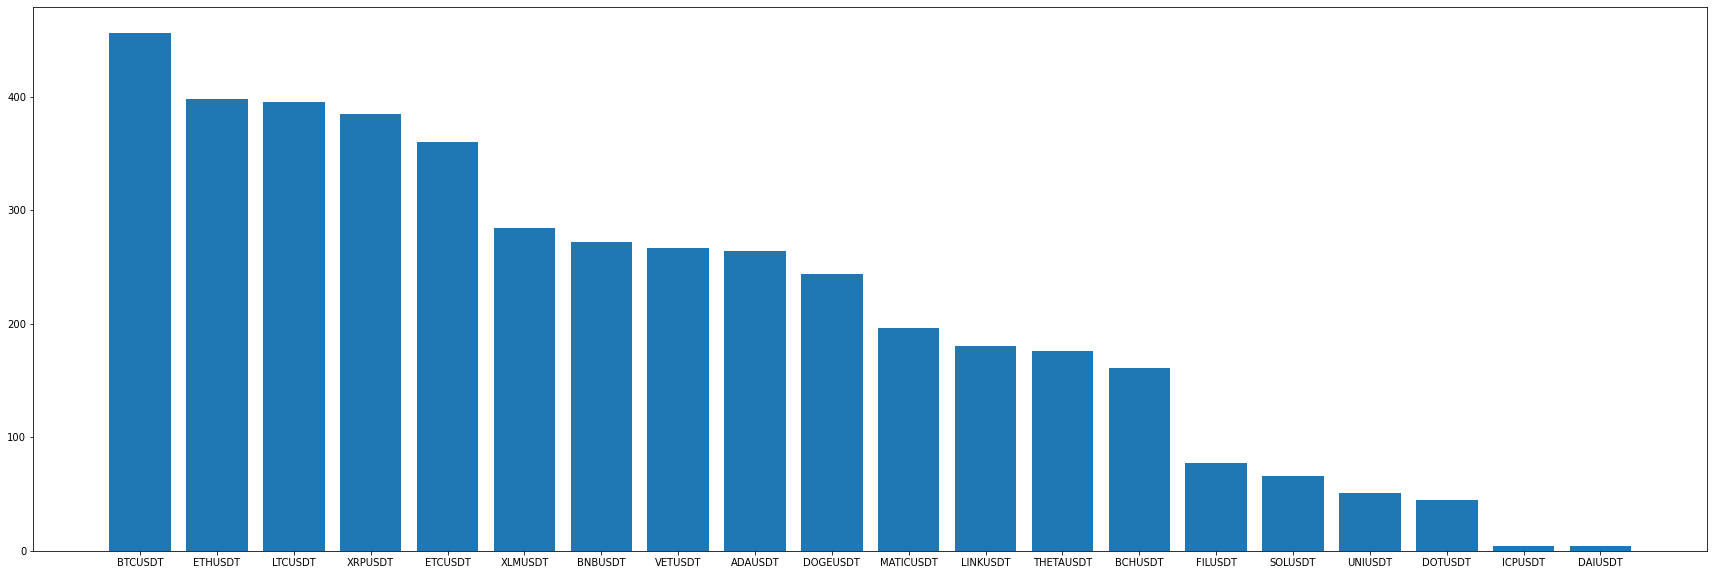

In [29]:
plot_sorted_bar_plot(coin_symbol_num_abnormal_1h_candle_dict)

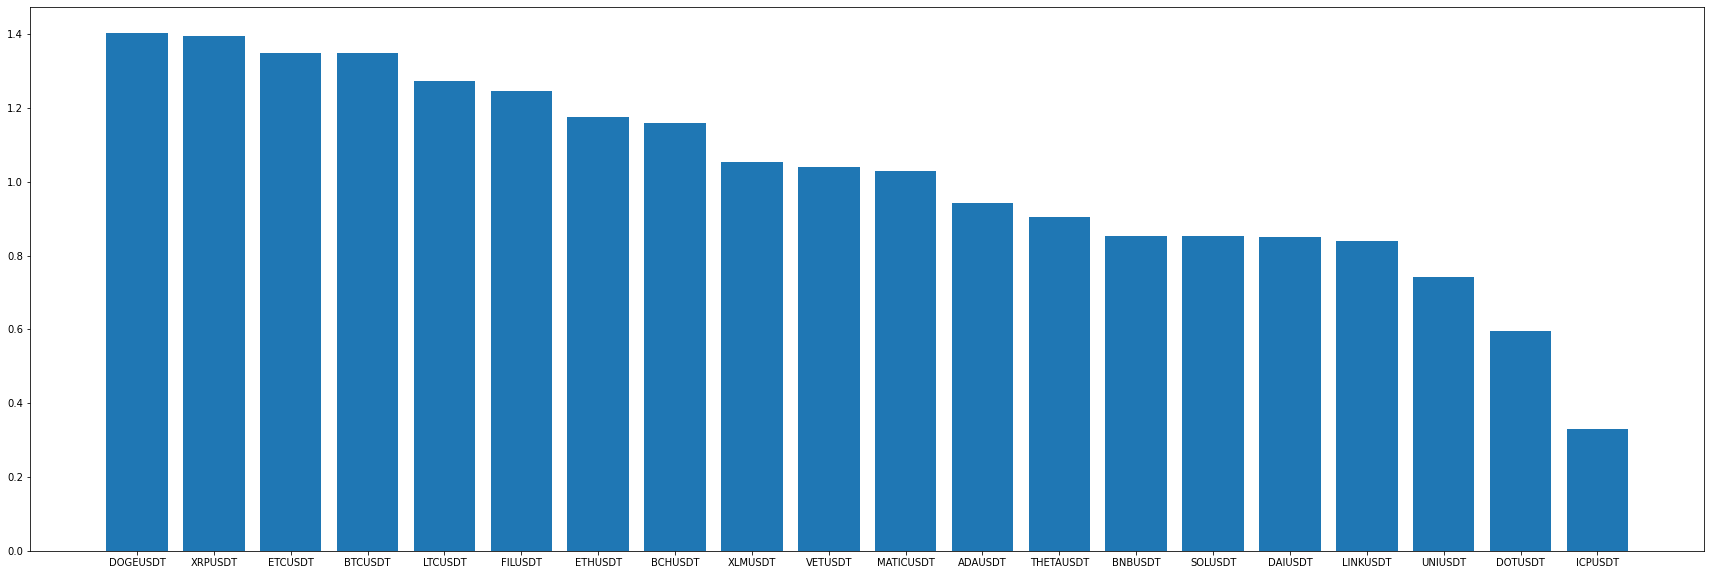

In [35]:
plot_sorted_bar_plot(symbol_precent_abnormal_dict)

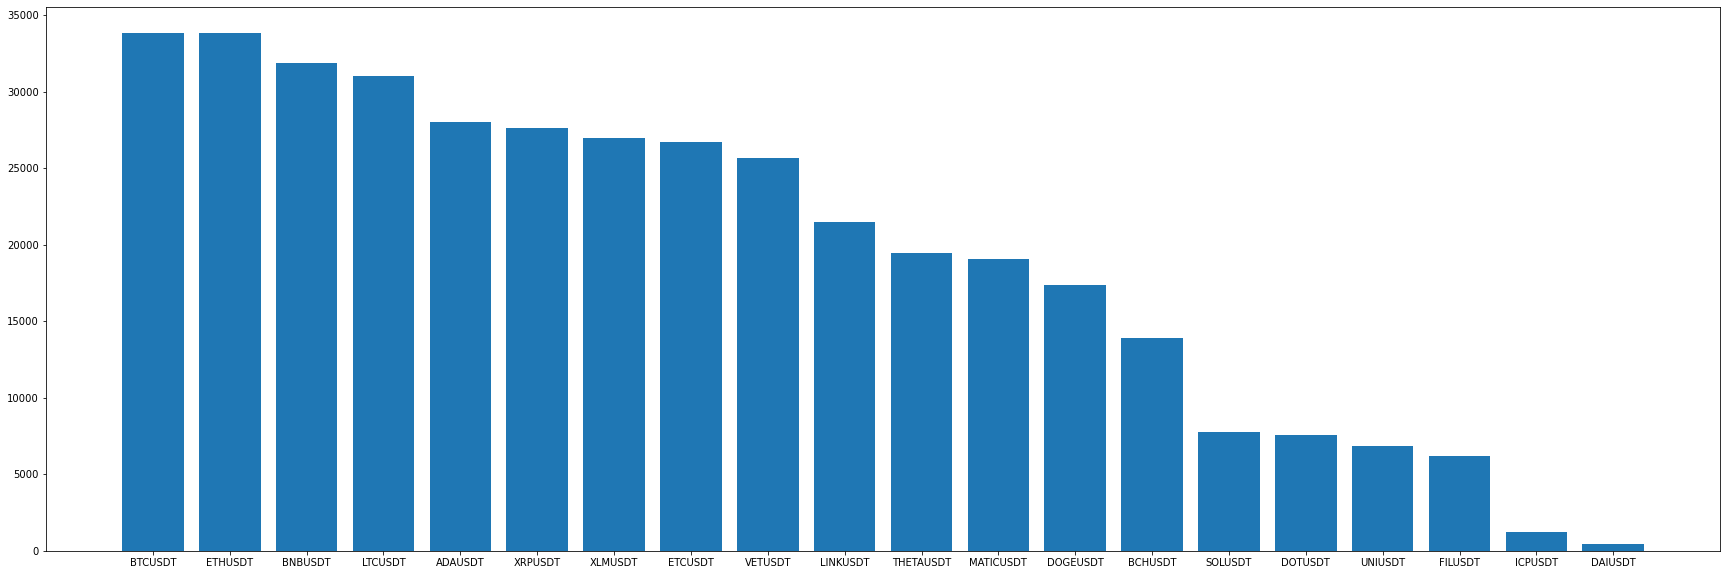

In [36]:
plot_sorted_bar_plot(symbol_data_length_dict)

# How much data we have compared to BTC

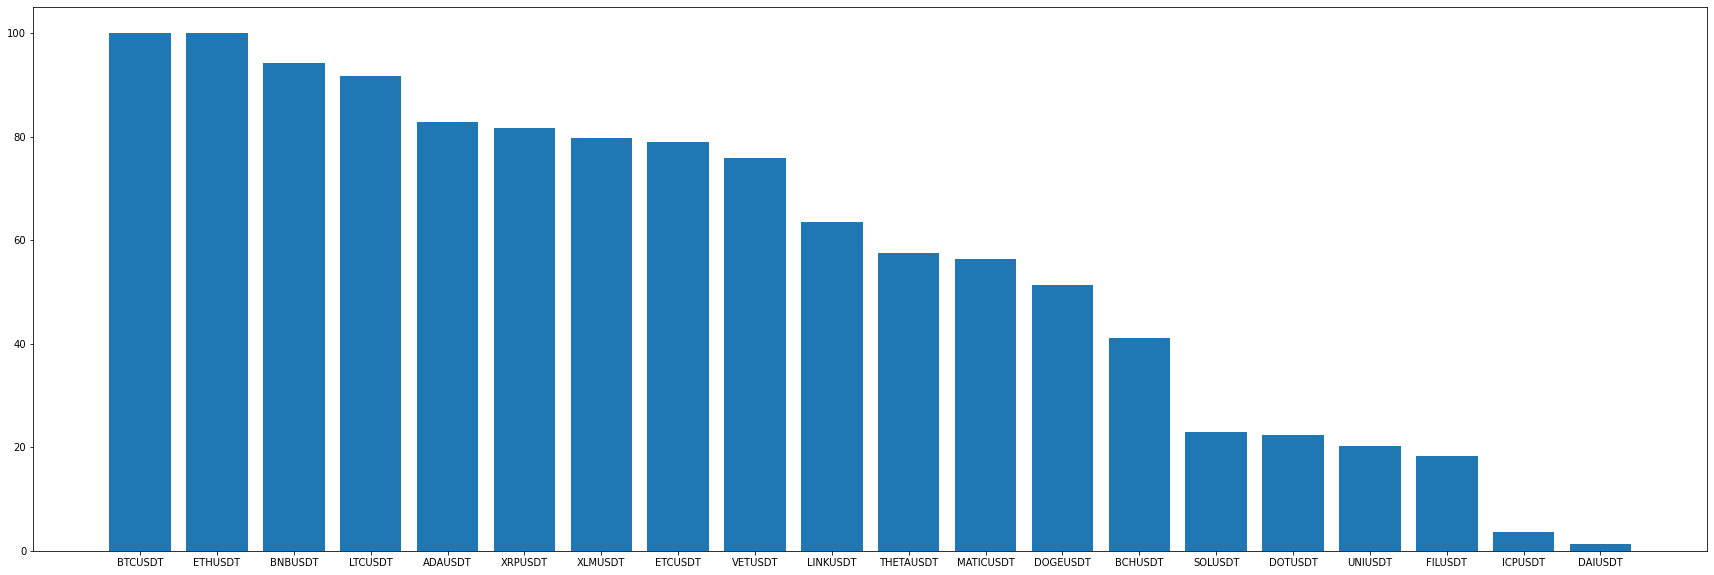

In [42]:
symbol_data_length_btc_precent = {k:100*(v/symbol_data_length_dict["BTCUSDT"]) for k, v in symbol_data_length_dict.items()}
plot_sorted_bar_plot(symbol_data_length_btc_precent)